# ASSIGNMENT- LINEAR REGRESSION

## PROBLEM STATEMENT

A Chinese automobile company __Geely Auto__ aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.  

They want to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
- Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market

## BUSINESS GOAL
This analysis aims to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Reading and Understanding the Data

In [196]:
# import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [197]:
# Loading Car Price data
df_car_price=pd.read_csv('CarPrice_Assignment.csv')

In [198]:
df_car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [199]:
#Checking shape of the dataframe.
df_car_price.shape

(205, 26)

In [200]:
# percentage of missing values in each column
print(round(100*(df_car_price.isnull().sum(axis=0)/len(df_car_price.index)), 2))

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


__None of the columns in car price dataframe has missing values__

In [201]:
# Checking data types
df_car_price.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [202]:
df_car_price.nunique().sort_values()

fueltype              2
aspiration            2
doornumber            2
enginelocation        2
drivewheel            3
carbody               5
symboling             6
enginetype            7
cylindernumber        7
fuelsystem            8
peakrpm              23
citympg              29
highwaympg           30
compressionratio     32
stroke               37
boreratio            38
carwidth             44
enginesize           44
carheight            49
wheelbase            53
horsepower           59
carlength            75
CarName             147
curbweight          171
price               189
car_ID              205
dtype: int64

In [203]:
#CarName' variable have entries which contains Name of Car company as substring. 
#Let's consider only name of the Car Company for our purpose of analysis

In [204]:
df_car_price['car_company']=df_car_price['CarName'].apply(lambda x: x.split(' ')[0])

In [205]:
#dropping 'CarName' variable
df_car_price=df_car_price.drop(['CarName'],axis=1)
df_car_price.head(1)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero


In [206]:
#dropping 'car_ID' variable as it is not needed for analysis
df_car_price=df_car_price.drop(['car_ID'],axis=1)

In [207]:
df_car_price.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero


In [208]:
df_car_price.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
5%,-1.000000,93.020000,157.140000,63.600000,49.700000,1901.000000,90.000000,2.970000,2.640000,7.500000,62.000000,4250.000000,16.000000,22.000000,6197.000000
10%,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000,6657.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,3.000000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,10.940000,160.000000,5780.000000,31.600000,38.000000,22563.000000


### Checking each columns for unique values (categorical variables)

In [209]:
df_car_price['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [210]:
df_car_price['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [211]:
df_car_price['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [212]:
df_car_price['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [213]:
df_car_price['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [214]:
df_car_price['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [215]:
df_car_price['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [216]:
df_car_price['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [217]:
df_car_price['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [218]:
df_car_price['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As we can see that there are some inconsistencies in car_company entries, the same is neing dealt with herem

In [219]:
df_car_price['car_company']=df_car_price['car_company'].apply(lambda x: x.lower())

In [220]:
df_car_price['car_company']=df_car_price['car_company'].replace({'maxda':'mazda','porcshce':'porsche',
                                                                               'toyouta':'toyota','vokswagen':'volkswagen',
                                                                              'vw':'volkswagen'})

In [221]:
df_car_price['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [222]:
# Checking duplicate rows
df_car_price.duplicated().unique()

array([False])

No duplicate rows are present

## Visualising the data

### Visualising the Numerical data

In [223]:
columns=df_car_price.columns
columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'car_company'],
      dtype='object')

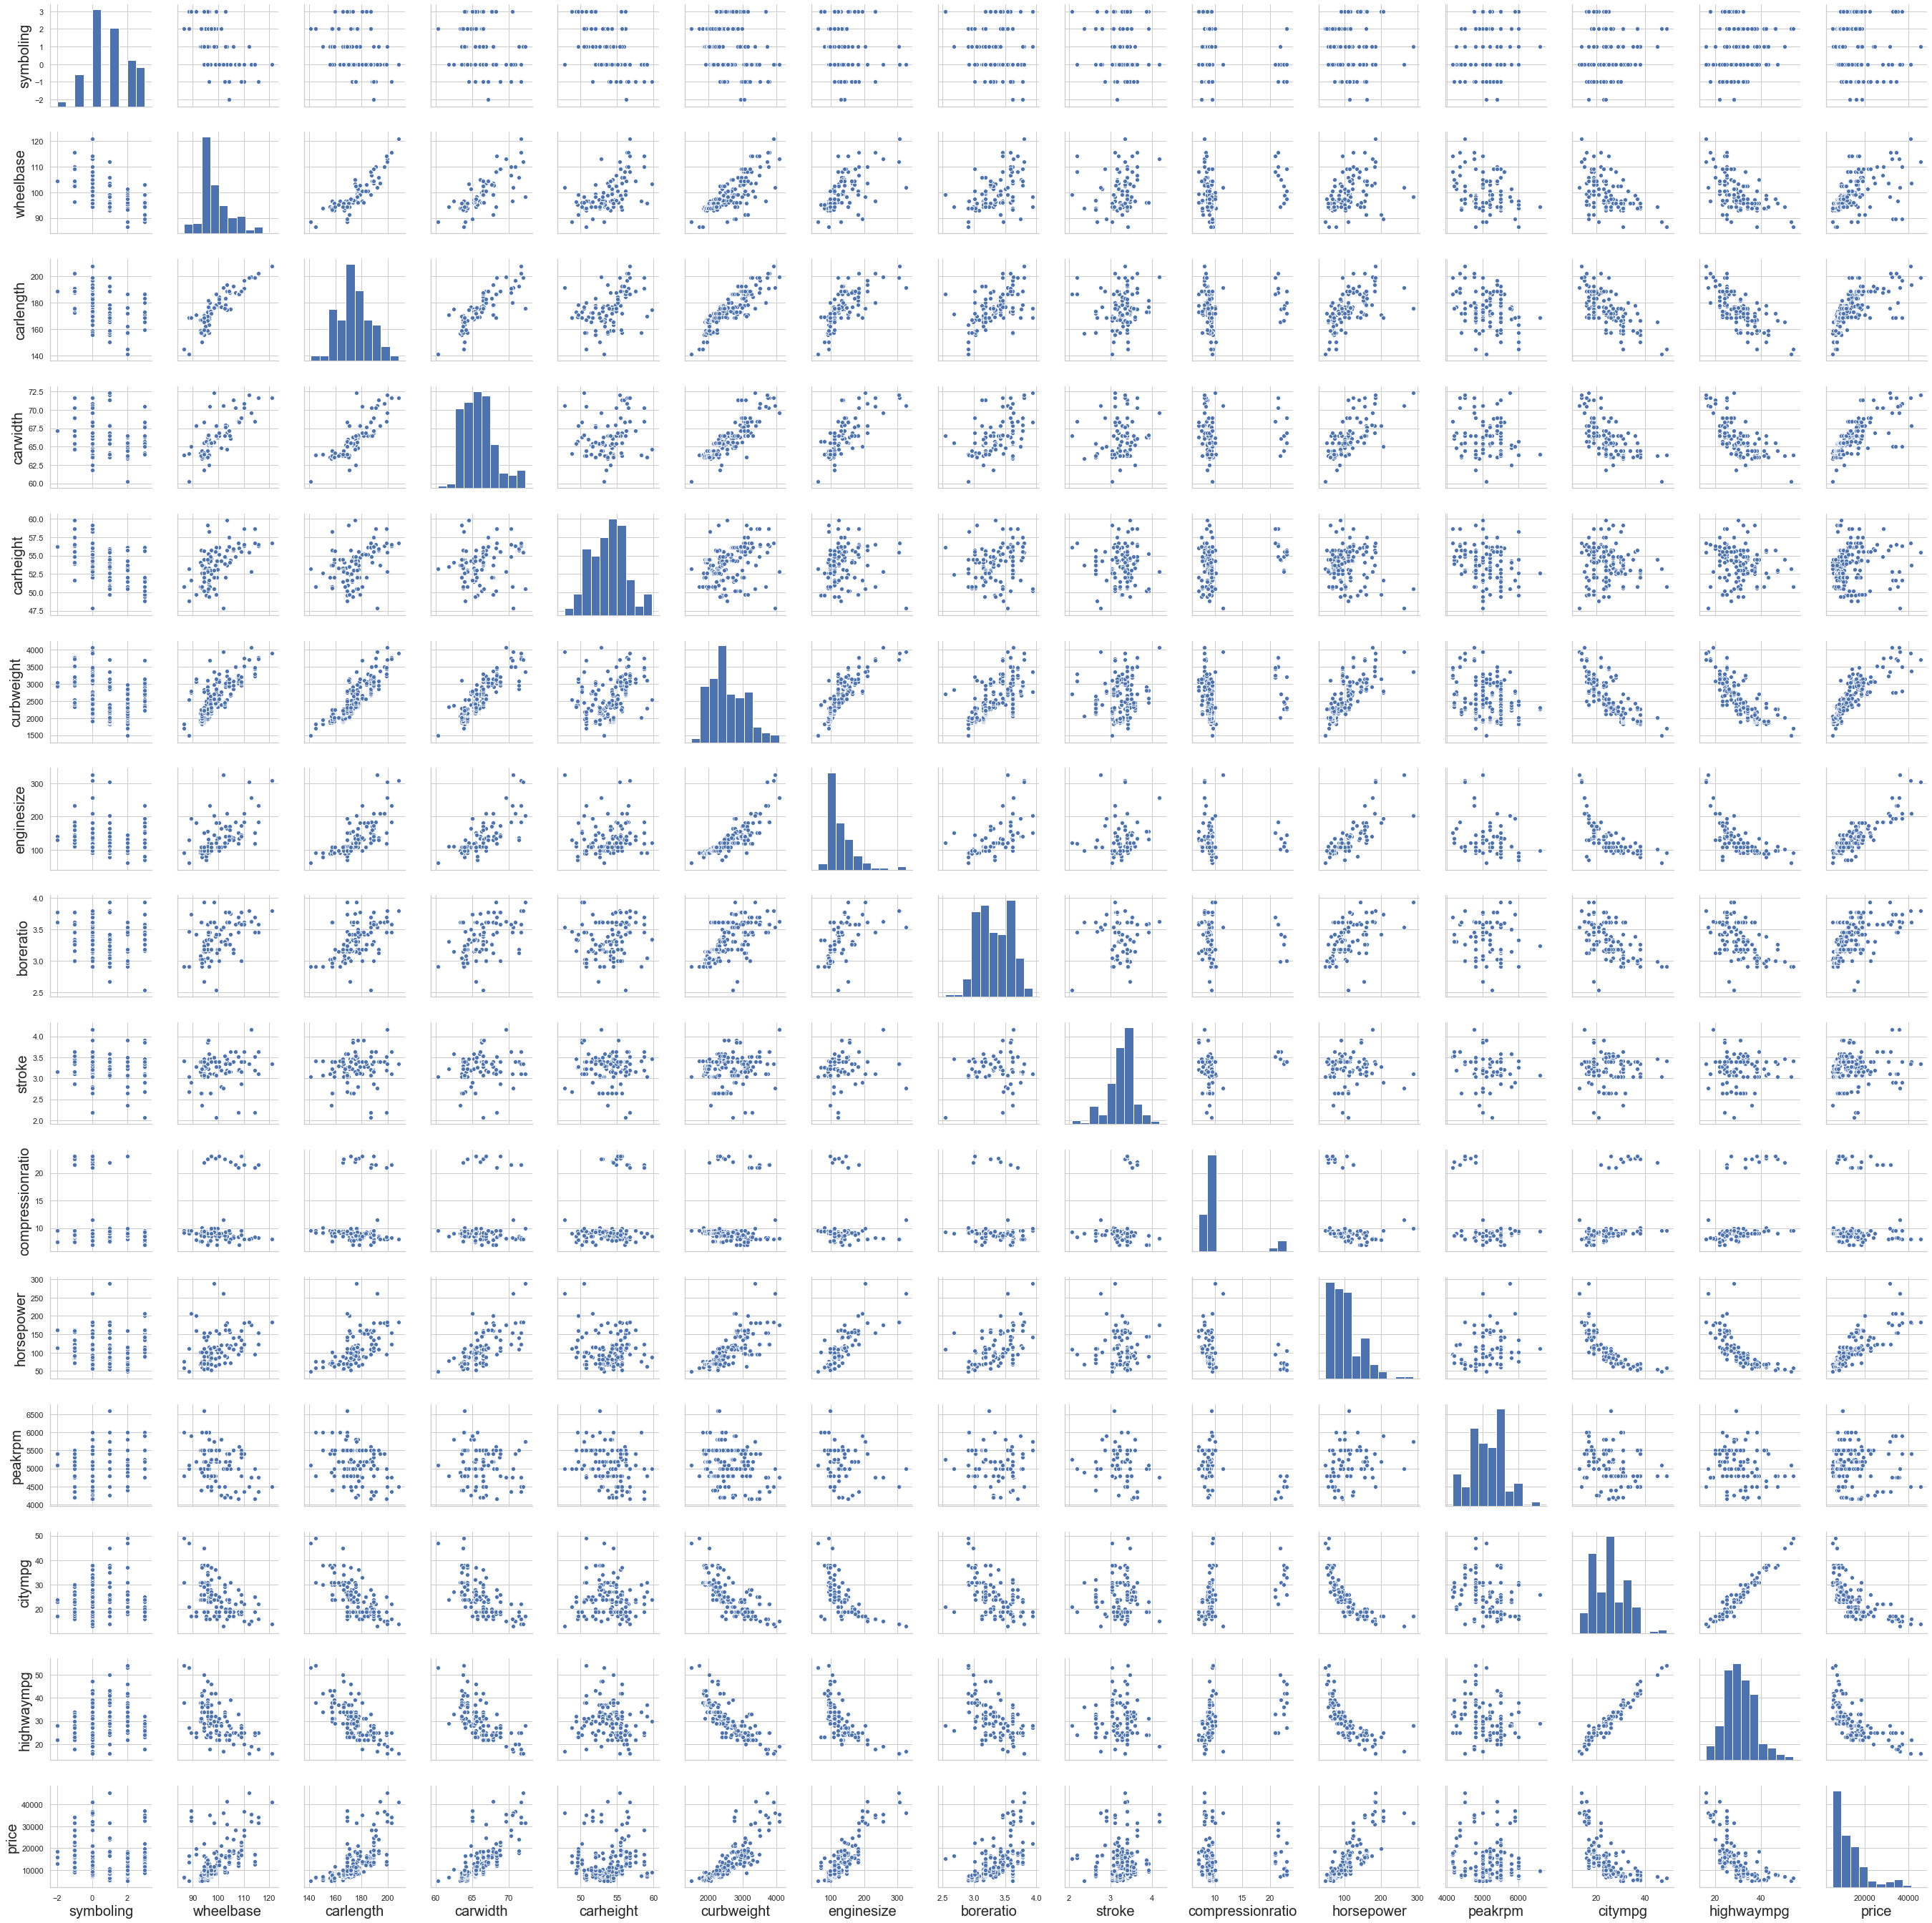

In [224]:
plt.rcParams["axes.labelsize"] = 20
sns.pairplot(df_car_price)

plt.show()

(15.5, -0.5)

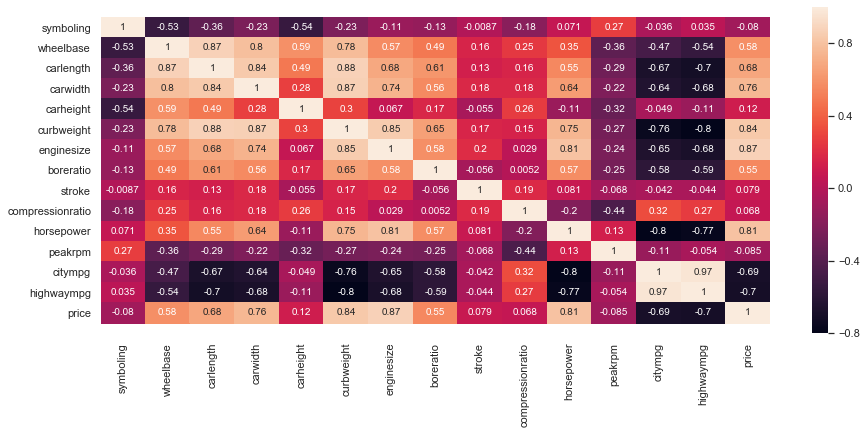

In [225]:
# Checking correlation matrix 
plt.figure(figsize=[15, 6])
ax = sns.heatmap(df_car_price.corr(), annot = True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

### Visualising the Categorical data

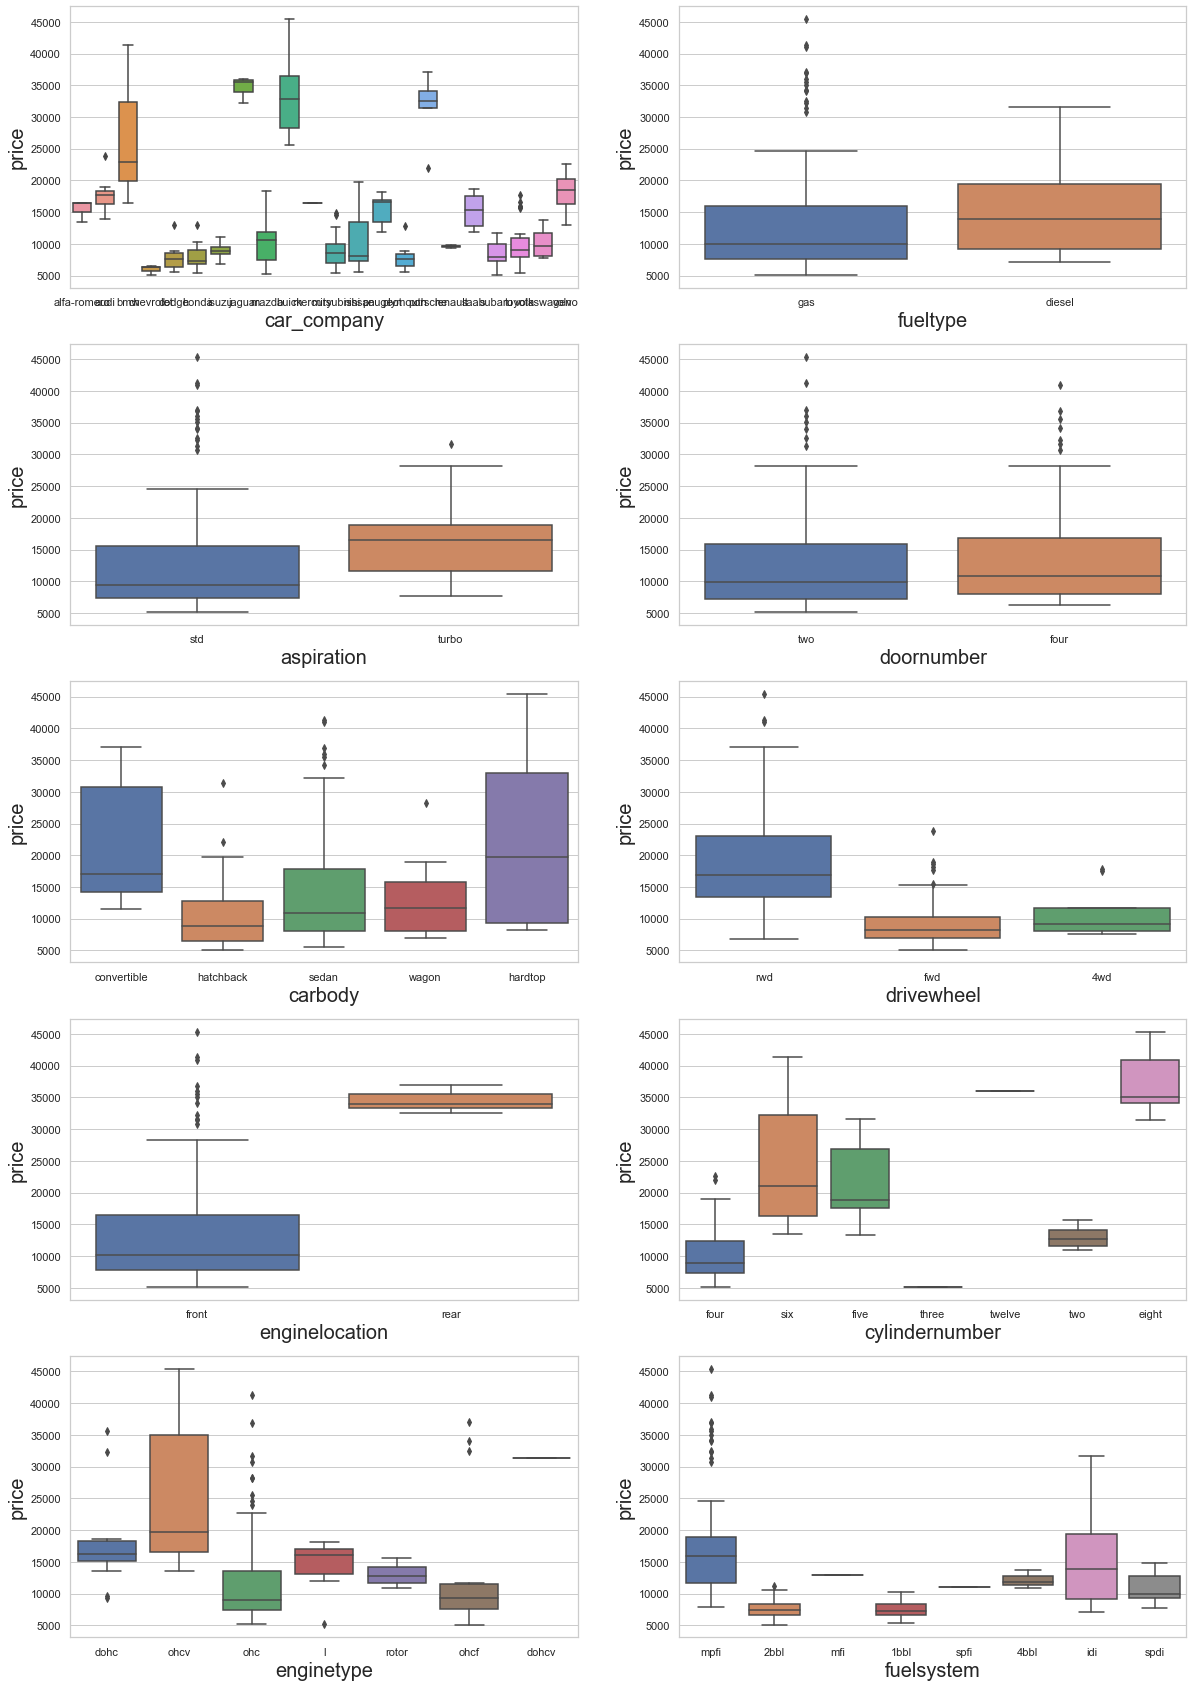

In [226]:
plt.figure(figsize=(20,30))
plt.subplot(5,2,1)
sns.boxplot(x='car_company',y='price',data=df_car_price)
plt.subplot(5,2,2)
sns.boxplot(x='fueltype',y='price',data=df_car_price)
plt.subplot(5,2,3)
sns.boxplot(x='aspiration',y='price',data=df_car_price)
plt.subplot(5,2,4)
sns.boxplot(x='doornumber',y='price',data=df_car_price)
plt.subplot(5,2,5)
sns.boxplot(x='carbody',y='price',data=df_car_price)
plt.subplot(5,2,6)
sns.boxplot(x='drivewheel',y='price',data=df_car_price)
plt.subplot(5,2,7)
sns.boxplot(x='enginelocation',y='price',data=df_car_price)
plt.subplot(5,2,8)
sns.boxplot(x='cylindernumber',y='price',data=df_car_price)
plt.subplot(5,2,9)
sns.boxplot(x='enginetype',y='price',data=df_car_price)
plt.subplot(5,2,10)
sns.boxplot(x='fuelsystem',y='price',data=df_car_price)
plt.show()

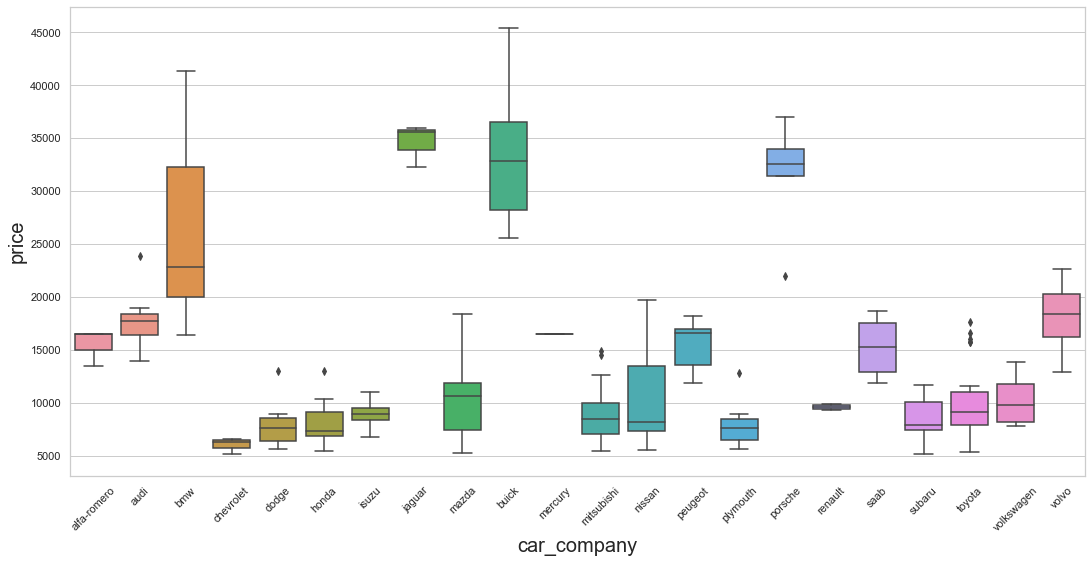

In [227]:
plt.figure(figsize=(40,50))
plt.subplot(5,2,1)
a=sns.boxplot(x='car_company',y='price',data=df_car_price)
a.set_xticklabels(a.get_xticklabels(), rotation=45)
plt.show()

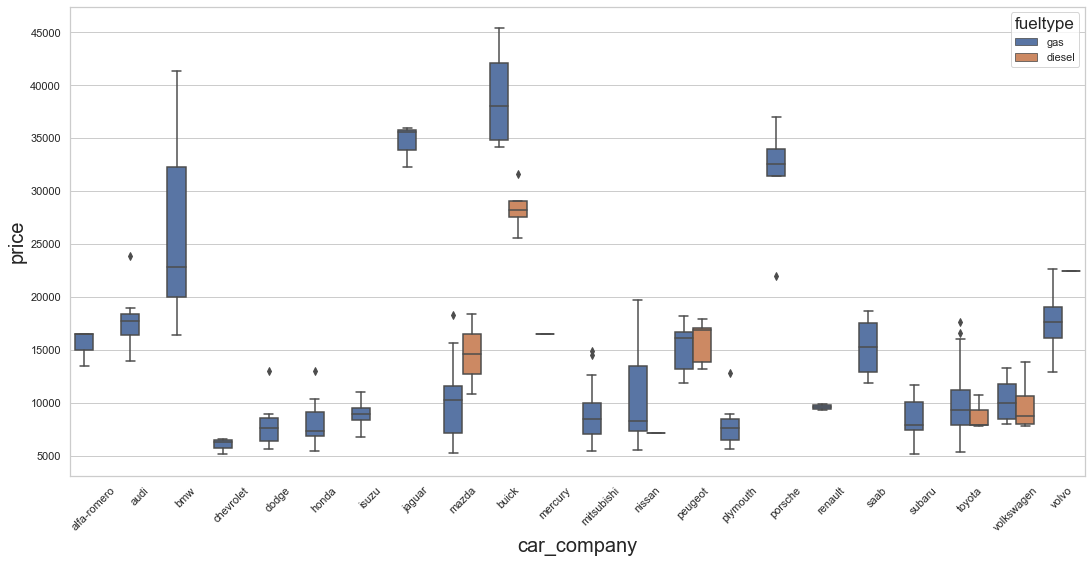

In [228]:
plt.figure(figsize=(40,50))
plt.subplot(5,2,1)
a=sns.boxplot(x='car_company',y='price',hue='fueltype',data=df_car_price)
a.set_xticklabels(a.get_xticklabels(), rotation=45)
plt.show()

- Thus we see that companies like __BMW, Jaguar, Buick and Porsche__ have cars in the range of much higher prices.
- We have few companies like __Mazda, Buick, Toyota and Volkswagen__ with Diesel engine Cars. This may be due to the fact that petrol engine emits lesser pollutants. 

In [229]:
df_car_price['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [230]:
df_car_price['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: car_company, dtype: int64

Text(0.5, 1.0, 'CAR COMPANIES SHARE\n\n\n\n\n ')

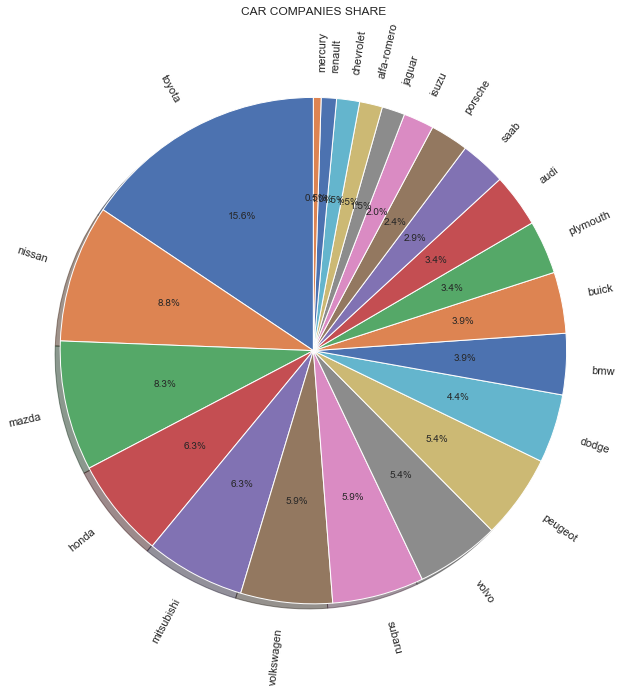

In [231]:
#Plot showing share of car_companies as per the dataset
plt.figure(figsize=(10,10))
plt.pie(list(df_car_price['car_company'].value_counts()), labels=list(df_car_price['car_company'].value_counts().index), 
        autopct='%1.1f%%', shadow=True, startangle=90, radius=1,rotatelabels=90)
plt.axis('equal')
plt.title('CAR COMPANIES SHARE\n\n\n\n\n ')

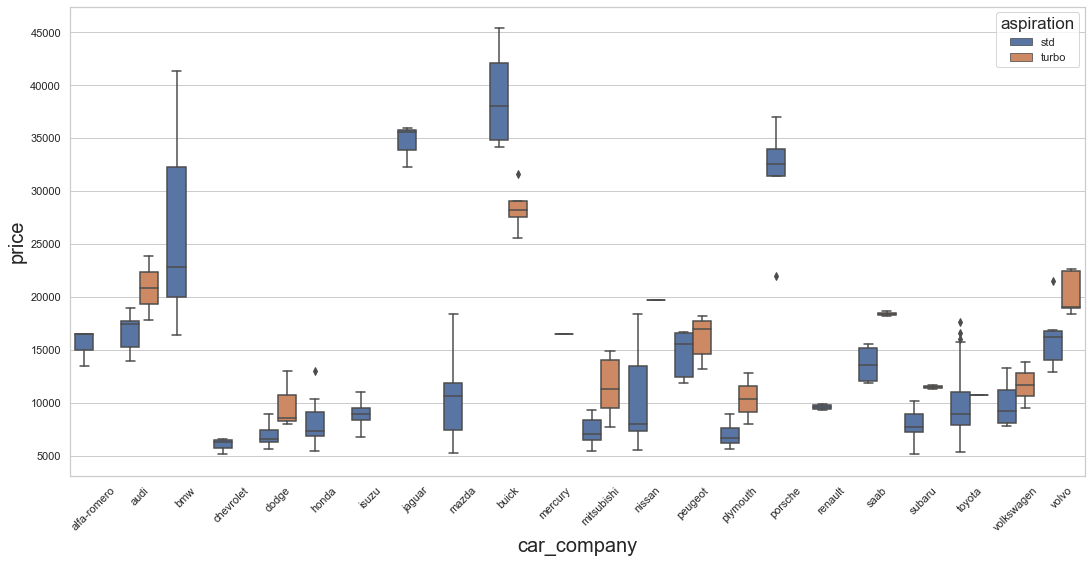

In [232]:
plt.figure(figsize=(40,50))
plt.subplot(5,2,1)
a=sns.boxplot(x='car_company',y='price',hue='aspiration',data=df_car_price)
a.set_xticklabels(a.get_xticklabels(), rotation=45)
plt.show()

## Data Preparation

### Binary data

In [233]:
# Dealing with columns with data of binary nature
df_car_price['fueltype']=df_car_price['fueltype'].map({'diesel':0,'gas':1})
df_car_price['aspiration']=df_car_price['aspiration'].map({'turbo':0,'std':1})
df_car_price['doornumber']=df_car_price['doornumber'].map({'two':0,'four':1})
df_car_price['enginelocation']=df_car_price['enginelocation'].map({'front':0,'rear':1})


In [234]:
df_car_price.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,1,1,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [235]:
# 'symboling' variable is ordinal in nature, so we can map the column as below
df_car_price['symboling']=df_car_price['symboling'].map({3:0,2:1,1:2,0:3,-1:4,-2:5})

In [236]:
df_car_price.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,0,1,1,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,0,1,1,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,2,1,1,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,1,1,1,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,1,1,1,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Dummy Variables

In [237]:
# Get the dummy variables for the features 'carbody','drivewheel','enginetype','cylindernumber','fuelsystem' and 'car_company'
temp1=pd.get_dummies(df_car_price['carbody'], drop_first = True)
temp2=pd.get_dummies(df_car_price['drivewheel'], drop_first = True)
temp3=pd.get_dummies(df_car_price['enginetype'], drop_first = True)
temp4=pd.get_dummies(df_car_price['fuelsystem'], drop_first = True)
temp5=pd.get_dummies(df_car_price['car_company'], drop_first = True)

In [238]:
# Add the results to the original 'df_car_price' dataframe
df_car_price=pd.concat([df_car_price,temp1,temp2,temp3,temp4,temp5],axis=1)

In [239]:
df_car_price.drop(['carbody','drivewheel','enginetype','cylindernumber','fuelsystem','car_company'], axis = 1, inplace = True)

In [240]:
df_car_price.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,1,1,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features using min-max scalar

In [243]:
from sklearn.preprocessing import MinMaxScaler

In [244]:
scaler=MinMaxScaler()

In [245]:
# Apply scaler() to all the columns except the 'binary' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke',
            'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [246]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,2,1,1,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,0,1,1,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,2,1,1,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,4,1,0,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [247]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,2.202797,0.909091,0.818182,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.195999,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0

## Building Model starting with all the variables

### Dividing Train data sets into X and y

In [248]:
y_train = df_train.pop('price')
X_train = df_train

In [249]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr= sm.OLS(y_train, X_train_lm).fit()

lr.params

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const               2.097821e-01
symboling          -3.696722e-04
fueltype           -1.355517e-01
aspiration         -7.627153e-02
doornumber          9.573535e-03
enginelocation      2.588670e-01
wheelbase           2.559793e-01
carlength          -1.538768e-01
carwidth            2.629872e-01
carheight          -1.706631e-01
curbweight          3.708835e-01
enginesize          8.770582e-01
boreratio          -1.590916e-01
stroke             -5.878972e-02
compressionratio   -6.278938e-01
horsepower         -2.107302e-01
peakrpm             2.152935e-01
citympg             1.115318e-01
highwaympg          9.395859e-02
hardtop            -1.109568e-01
hatchback          -1.260770e-01
sedan              -1.049029e-01
wagon              -8.738856e-02
fwd                -7.341577e-03
rwd                 1.610063e-02
dohcv               8.987501e-02
l                   2.278636e-01
ohc                 5.853996e-02
ohcf                1.156300e-01
ohcv               -9.641173e-03
rotor     

In [250]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     54.88
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.34e-50
Time:                        18:03:15   Log-Likelihood:                 268.41
No. Observations:                 143   AIC:                            -428.8
Df Residuals:                      89   BIC:                            -268.8
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2098      0.095  

#### Looking at the p-values of a variable, we observe that many variables have higher p-values. These variables seems not significant in presence of other variables. Before dropping them let's look at VIF values.

### Checking VIF

In [251]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [252]:
# Creating dataframe that will contain the names of ll the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
27,ohcf,inf
54,subaru,inf
4,enginelocation,inf
1,fueltype,636.64
32,idi,288.05
13,compressionratio,163.69
10,enginesize,81.82
34,mpfi,66.21
14,horsepower,56.26
16,citympg,54.01


We generally want a VIF that is less than 5. So there are clearly many variables we need to drop.

### Dropping the variable and updating the model

In [253]:
# Dropping 'symboling' variable first as it has highest p-value and lower VIF
X=X_train.drop('symboling', 1)

In [254]:
X_train_lm = sm.add_constant(X)

lr_2= sm.OLS(y_train, X_train_lm).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [255]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     56.56
Date:                Sun, 31 May 2020   Prob (F-statistic):           5.73e-51
Time:                        18:03:16   Log-Likelihood:                 268.41
No. Observations:                 143   AIC:                            -430.8
Df Residuals:                      90   BIC:                            -273.8
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2098      0.095  

In [256]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
53,subaru,inf
26,ohcf,inf
3,enginelocation,inf
0,fueltype,634.01
31,idi,287.46
12,compressionratio,162.44
9,enginesize,80.70
33,mpfi,65.75
15,citympg,54.01
13,horsepower,53.99


### Dropping the variable and updating the model

In [257]:
# Dropping 'mpfi' variable as it has p-value of 0.869(highest) and very high VIF of 65.75
X=X.drop('mpfi', 1)

In [258]:
X_train_lm = sm.add_constant(X)

lr_3= sm.OLS(y_train, X_train_lm).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [259]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     58.29
Date:                Sun, 31 May 2020   Prob (F-statistic):           7.54e-52
Time:                        18:03:16   Log-Likelihood:                 268.39
No. Observations:                 143   AIC:                            -432.8
Df Residuals:                      91   BIC:                            -278.7
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2053      0.090  

In [260]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
26,ohcf,inf
3,enginelocation,inf
52,subaru,inf
0,fueltype,369.08
31,idi,285.98
12,compressionratio,162.42
9,enginesize,71.04
15,citympg,53.63
13,horsepower,49.65
16,highwaympg,47.79


### Dropping the variable and updating the model

In [261]:
# Dropping 'spdi' variable 
X=X.drop('spdi', 1)

In [262]:
X_train_lm = sm.add_constant(X)

lr_4= sm.OLS(y_train, X_train_lm).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [263]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     60.06
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.00e-52
Time:                        18:03:16   Log-Likelihood:                 268.33
No. Observations:                 143   AIC:                            -434.7
Df Residuals:                      92   BIC:                            -283.5
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2007      0.088  

In [264]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
26,ohcf,inf
3,enginelocation,inf
51,subaru,inf
0,fueltype,353.99
31,idi,279.17
12,compressionratio,159.87
9,enginesize,68.95
15,citympg,53.33
13,horsepower,48.55
16,highwaympg,47.77


### Dropping the variable and updating the model

In [265]:
# Dropping 'ohcv' variable
X=X.drop('ohcv', 1)

In [266]:
X_train_lm = sm.add_constant(X)

lr_5= sm.OLS(y_train, X_train_lm).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [267]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     61.90
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.31e-53
Time:                        18:03:16   Log-Likelihood:                 268.27
No. Observations:                 143   AIC:                            -436.5
Df Residuals:                      93   BIC:                            -288.4
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1949      0.085  

In [268]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
26,ohcf,inf
3,enginelocation,inf
50,subaru,inf
0,fueltype,328.21
30,idi,267.09
12,compressionratio,156.81
9,enginesize,61.81
15,citympg,51.00
16,highwaympg,47.26
13,horsepower,47.25


### Dropping the variable and updating the model

In [269]:
# Dropping 'fwd' variable
X=X.drop('fwd', 1)

In [270]:
X_train_lm = sm.add_constant(X)

lr_6= sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.71e-54
Time:                        18:03:17   Log-Likelihood:                 268.19
No. Observations:                 143   AIC:                            -438.4
Df Residuals:                      94   BIC:                            -293.2
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1922      0.084  

In [271]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
25,ohcf,inf
3,enginelocation,inf
49,subaru,inf
0,fueltype,300.92
29,idi,266.96
12,compressionratio,155.28
9,enginesize,61.22
15,citympg,49.74
13,horsepower,47.21
16,highwaympg,45.61


### Dropping the variable and updating the model

In [272]:
# Dropping 'spfi' variable
X=X.drop('spfi', 1)

In [273]:
X_train_lm = sm.add_constant(X)

lr_7= sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.71e-54
Time:                        18:03:17   Log-Likelihood:                 268.19
No. Observations:                 143   AIC:                            -438.4
Df Residuals:                      94   BIC:                            -293.2
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1922      0.084  

In [274]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
25,ohcf,inf
3,enginelocation,inf
48,subaru,inf
0,fueltype,300.92
29,idi,266.96
12,compressionratio,155.28
9,enginesize,61.22
15,citympg,49.74
13,horsepower,47.21
16,highwaympg,45.61


### Dropping the variable and updating the model

In [275]:
# Dropping 'highwaympg' variable
X=X.drop('highwaympg', 1)

In [276]:
X_train_lm = sm.add_constant(X)

lr_8= sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     65.60
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.48e-55
Time:                        18:03:17   Log-Likelihood:                 267.93
No. Observations:                 143   AIC:                            -439.9
Df Residuals:                      95   BIC:                            -297.6
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1993      0.083  

In [277]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
24,ohcf,inf
3,enginelocation,inf
47,subaru,inf
0,fueltype,291.61
28,idi,263.38
12,compressionratio,154.96
9,enginesize,60.15
13,horsepower,46.80
8,curbweight,36.46
18,sedan,28.65


### Dropping the variable and updating the model

In [278]:
# Dropping 'buick' variable
X=X.drop('buick', 1)

In [279]:
X_train_lm = sm.add_constant(X)

lr_9= sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     67.27
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.08e-56
Time:                        18:03:17   Log-Likelihood:                 267.46
No. Observations:                 143   AIC:                            -440.9
Df Residuals:                      96   BIC:                            -301.7
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1917      0.083  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [280]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
24,ohcf,inf
3,enginelocation,inf
46,subaru,inf
0,fueltype,290.55
28,idi,259.69
12,compressionratio,150.62
9,enginesize,46.28
13,horsepower,40.19
8,curbweight,36.12
18,sedan,28.18


### Dropping the variable and updating the model

In [281]:
# Dropping 'jaguar' variable
X=X.drop('jaguar', 1)

In [282]:
X_train_lm = sm.add_constant(X)

lr_10= sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     69.15
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.06e-57
Time:                        18:03:18   Log-Likelihood:                 267.13
No. Observations:                 143   AIC:                            -442.3
Df Residuals:                      97   BIC:                            -306.0
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2074      0.079  

In [283]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
45,subaru,inf
3,enginelocation,inf
24,ohcf,inf
0,fueltype,282.55
28,idi,237.83
12,compressionratio,143.42
13,horsepower,39.92
9,enginesize,39.00
8,curbweight,34.83
18,sedan,27.66


### Dropping the variable and updating the model

In [284]:
# Dropping 'mercury' variable
X=X.drop('mercury', 1)

In [285]:
X_train_lm = sm.add_constant(X)

lr_11= sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     69.15
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.06e-57
Time:                        18:03:18   Log-Likelihood:                 267.13
No. Observations:                 143   AIC:                            -442.3
Df Residuals:                      97   BIC:                            -306.0
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2074      0.079  

In [286]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
44,subaru,inf
3,enginelocation,inf
24,ohcf,inf
0,fueltype,282.55
28,idi,237.83
12,compressionratio,143.42
13,horsepower,39.92
9,enginesize,39.00
8,curbweight,34.83
18,sedan,27.66


### Dropping the variable and updating the model

In [287]:
# Dropping 'mfi' variable
X=X.drop('mfi', 1)

In [288]:
X_train_lm = sm.add_constant(X)

lr_12= sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     69.15
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.06e-57
Time:                        18:03:18   Log-Likelihood:                 267.13
No. Observations:                 143   AIC:                            -442.3
Df Residuals:                      97   BIC:                            -306.0
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2074      0.079  

In [289]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
43,subaru,inf
3,enginelocation,inf
24,ohcf,inf
0,fueltype,282.55
28,idi,237.83
12,compressionratio,143.42
13,horsepower,39.92
9,enginesize,39.00
8,curbweight,34.83
18,sedan,27.66


### Dropping the variable and updating the model

In [290]:
# Dropping 'doornumber' variable
X=X.drop('doornumber', 1)

In [291]:
X_train_lm = sm.add_constant(X)

lr_13= sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     70.94
Date:                Sun, 31 May 2020   Prob (F-statistic):           9.96e-58
Time:                        18:03:18   Log-Likelihood:                 266.63
No. Observations:                 143   AIC:                            -443.3
Df Residuals:                      98   BIC:                            -309.9
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2062      0.079  

In [292]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
23,ohcf,inf
42,subaru,inf
2,enginelocation,inf
0,fueltype,282.50
27,idi,237.65
11,compressionratio,143.16
12,horsepower,39.89
8,enginesize,37.82
7,curbweight,34.41
17,sedan,26.49


### Dropping the variable and updating the model

In [293]:
# Dropping 'volvo' variable
X=X.drop('volvo', 1)

In [294]:
X_train_lm = sm.add_constant(X)

lr_14= sm.OLS(y_train, X_train_lm).fit()
print(lr_14.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     72.76
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.67e-58
Time:                        18:03:18   Log-Likelihood:                 266.09
No. Observations:                 143   AIC:                            -444.2
Df Residuals:                      99   BIC:                            -313.8
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2239      0.076  

In [295]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
2,enginelocation,inf
23,ohcf,inf
42,subaru,inf
0,fueltype,277.54
27,idi,220.04
11,compressionratio,133.62
12,horsepower,37.69
8,enginesize,34.49
7,curbweight,34.41
17,sedan,25.93


### Dropping the variable and updating the model

In [296]:
# Dropping 'rwd' variable
X=X.drop('rwd', 1)

In [297]:
X_train_lm = sm.add_constant(X)

lr_15= sm.OLS(y_train, X_train_lm).fit()
print(lr_15.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     74.68
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.75e-59
Time:                        18:03:19   Log-Likelihood:                 265.56
No. Observations:                 143   AIC:                            -445.1
Df Residuals:                     100   BIC:                            -317.7
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2284      0.076  

In [298]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
22,ohcf,inf
41,subaru,inf
2,enginelocation,inf
0,fueltype,262.96
26,idi,220.03
11,compressionratio,130.93
12,horsepower,36.72
7,curbweight,33.45
8,enginesize,31.88
17,sedan,25.82


### Dropping the variable and updating the model

In [299]:
# Dropping 'dohcv' variable
X=X.drop('dohcv', 1)

In [300]:
X_train_lm = sm.add_constant(X)

lr_16= sm.OLS(y_train, X_train_lm).fit()
print(lr_16.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     76.66
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.53e-60
Time:                        18:03:19   Log-Likelihood:                 265.01
No. Observations:                 143   AIC:                            -446.0
Df Residuals:                     101   BIC:                            -321.6
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2223      0.075  

In [301]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
21,ohcf,inf
40,subaru,inf
2,enginelocation,inf
0,fueltype,250.23
25,idi,219.73
11,compressionratio,130.92
7,curbweight,33.44
8,enginesize,26.09
17,sedan,25.36
4,carlength,23.66


### Dropping the variable and updating the model

In [302]:
# Dropping 'horsepower' variable
X=X.drop('horsepower', 1)

In [303]:
X_train_lm = sm.add_constant(X)

lr_17= sm.OLS(y_train, X_train_lm).fit()
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     78.89
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.70e-61
Time:                        18:03:19   Log-Likelihood:                 264.61
No. Observations:                 143   AIC:                            -447.2
Df Residuals:                     102   BIC:                            -325.7
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2217      0.075  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [304]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
2,enginelocation,inf
39,subaru,inf
20,ohcf,inf
0,fueltype,241.92
24,idi,219.21
11,compressionratio,130.14
7,curbweight,33.40
16,sedan,24.13
4,carlength,23.65
8,enginesize,19.60


### Dropping the variable and updating the model

In [305]:
# Dropping 'stroke' variable
X=X.drop('stroke', 1)

In [306]:
X_train_lm = sm.add_constant(X)

lr_18= sm.OLS(y_train, X_train_lm).fit()
print(lr_18.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     81.03
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.11e-61
Time:                        18:03:19   Log-Likelihood:                 264.03
No. Observations:                 143   AIC:                            -448.1
Df Residuals:                     103   BIC:                            -329.6
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1929      0.068  

In [307]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
2,enginelocation,inf
38,subaru,inf
19,ohcf,inf
0,fueltype,226.32
23,idi,178.75
10,compressionratio,109.29
7,curbweight,33.36
15,sedan,23.89
4,carlength,23.47
14,hatchback,19.20


### Dropping the variable and updating the model

In [308]:
# Dropping '4bbl' variable
X=X.drop('4bbl', 1)

In [309]:
X_train_lm = sm.add_constant(X)

lr_19= sm.OLS(y_train, X_train_lm).fit()
print(lr_19.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     82.79
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.42e-62
Time:                        18:03:19   Log-Likelihood:                 263.05
No. Observations:                 143   AIC:                            -448.1
Df Residuals:                     104   BIC:                            -332.6
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1912      0.068  

In [310]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
19,ohcf,inf
37,subaru,inf
2,enginelocation,inf
0,fueltype,226.21
22,idi,178.69
10,compressionratio,109.27
7,curbweight,33.32
15,sedan,23.89
4,carlength,23.47
14,hatchback,19.20


### Dropping the variable and updating the model

In [311]:
# Dropping 'carlength' variable
X=X.drop('carlength', 1)

In [312]:
X_train_lm = sm.add_constant(X)

lr_20= sm.OLS(y_train, X_train_lm).fit()
print(lr_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     83.37
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.12e-62
Time:                        18:03:19   Log-Likelihood:                 261.03
No. Observations:                 143   AIC:                            -446.1
Df Residuals:                     105   BIC:                            -333.5
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1829      0.069  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [313]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
18,ohcf,inf
36,subaru,inf
2,enginelocation,inf
0,fueltype,215.33
21,idi,178.68
9,compressionratio,108.30
6,curbweight,30.35
14,sedan,22.12
13,hatchback,18.98
16,l,16.98


### Dropping the variable and updating the model

In [314]:
# Dropping 'ohcf' variable
X=X.drop('ohcf', 1)

In [315]:
X_train_lm = sm.add_constant(X)

lr_21= sm.OLS(y_train, X_train_lm).fit()
print(lr_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     83.37
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.12e-62
Time:                        18:03:20   Log-Likelihood:                 261.03
No. Observations:                 143   AIC:                            -446.1
Df Residuals:                     105   BIC:                            -333.5
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1829      0.069  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [316]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,fueltype,215.33
20,idi,178.68
9,compressionratio,108.30
6,curbweight,30.35
14,sedan,22.12
13,hatchback,18.98
16,l,16.98
7,enginesize,16.83
30,peugeot,14.47
15,wagon,12.53


### Dropping the variable and updating the model

In [317]:
# Dropping 'subaru' variable
X=X.drop('subaru', 1)

In [318]:
X_train_lm = sm.add_constant(X)

lr_22= sm.OLS(y_train, X_train_lm).fit()
print(lr_22.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     86.48
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.21e-63
Time:                        18:03:20   Log-Likelihood:                 261.01
No. Observations:                 143   AIC:                            -448.0
Df Residuals:                     106   BIC:                            -338.4
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1862      0.065  

In [319]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,fueltype,196.92
20,idi,166.58
9,compressionratio,104.80
6,curbweight,28.44
14,sedan,17.07
7,enginesize,15.60
16,l,15.19
13,hatchback,14.66
30,peugeot,14.45
3,wheelbase,12.11


### Dropping the variable and updating the model

In [320]:
# Dropping 'fueltype' variable
X=X.drop('fueltype', 1)

In [321]:
X_train_lm = sm.add_constant(X)

lr_23= sm.OLS(y_train, X_train_lm).fit()
print(lr_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     86.48
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.21e-63
Time:                        18:03:20   Log-Likelihood:                 261.01
No. Observations:                 143   AIC:                            -448.0
Df Residuals:                     106   BIC:                            -338.4
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0227      0.056  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [322]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
8,compressionratio,169.71
19,idi,125.34
5,curbweight,110.80
3,carwidth,86.28
2,wheelbase,55.73
6,enginesize,53.49
4,carheight,34.98
10,citympg,33.93
13,sedan,30.00
7,boreratio,19.84


### Dropping the variable and updating the model

In [323]:
# Dropping 'compressionratio' variable
X=X.drop('compressionratio', 1)

In [324]:
X_train_lm = sm.add_constant(X)

lr_24= sm.OLS(y_train, X_train_lm).fit()
print(lr_24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     78.91
Date:                Sun, 31 May 2020   Prob (F-statistic):           9.24e-62
Time:                        18:03:20   Log-Likelihood:                 252.10
No. Observations:                 143   AIC:                            -432.2
Df Residuals:                     107   BIC:                            -325.5
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0065      0.058     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [325]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,110.69
3,carwidth,83.88
2,wheelbase,55.47
6,enginesize,52.94
4,carheight,33.82
9,citympg,31.24
12,sedan,28.59
11,hatchback,19.09
7,boreratio,19.00
14,l,16.17


### Dropping the variable and updating the model

In [326]:
# Dropping 'idi' variable
X=X.drop('idi', 1)

In [327]:
X_train_lm = sm.add_constant(X)

lr_25= sm.OLS(y_train, X_train_lm).fit()
print(lr_25.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     81.81
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.13e-62
Time:                        18:03:20   Log-Likelihood:                 251.95
No. Observations:                 143   AIC:                            -433.9
Df Residuals:                     108   BIC:                            -330.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0007      0.057     -0.

In [328]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,102.44
3,carwidth,81.44
6,enginesize,52.79
2,wheelbase,51.84
4,carheight,33.58
12,sedan,27.63
7,boreratio,18.74
11,hatchback,18.13
9,citympg,17.21
14,l,15.99


### Dropping the variable and updating the model

In [329]:
# Dropping 'audi' variable
X=X.drop('audi', 1)

In [330]:
X_train_lm = sm.add_constant(X)

lr_26= sm.OLS(y_train, X_train_lm).fit()
print(lr_26.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     83.92
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.47e-63
Time:                        18:03:20   Log-Likelihood:                 251.01
No. Observations:                 143   AIC:                            -434.0
Df Residuals:                     109   BIC:                            -333.3
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0095      0.057     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [331]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,102.36
3,carwidth,68.64
6,enginesize,51.42
2,wheelbase,44.84
4,carheight,33.57
12,sedan,24.70
11,hatchback,16.38
7,boreratio,16.26
9,citympg,15.79
14,l,15.49


### Dropping the variable and updating the model

In [332]:
# Dropping 'isuzu' variable
X=X.drop('isuzu', 1)

In [333]:
X_train_lm = sm.add_constant(X)

lr_27= sm.OLS(y_train, X_train_lm).fit()
print(lr_27.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     85.73
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.88e-64
Time:                        18:03:21   Log-Likelihood:                 249.74
No. Observations:                 143   AIC:                            -433.5
Df Residuals:                     110   BIC:                            -335.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0147      0.057     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [334]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,101.25
3,carwidth,61.46
6,enginesize,50.65
2,wheelbase,44.56
4,carheight,32.37
12,sedan,24.25
11,hatchback,16.25
7,boreratio,15.94
14,l,15.49
25,peugeot,14.74


### Dropping the variable and updating the model

In [335]:
# Dropping 'mazda' variable
X=X.drop('mazda', 1)

In [336]:
X_train_lm = sm.add_constant(X)

lr_28= sm.OLS(y_train, X_train_lm).fit()
print(lr_28.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     87.00
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.86e-64
Time:                        18:03:21   Log-Likelihood:                 247.95
No. Observations:                 143   AIC:                            -431.9
Df Residuals:                     111   BIC:                            -337.1
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0154      0.057     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [337]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,99.38
3,carwidth,60.69
6,enginesize,49.74
2,wheelbase,42.84
4,carheight,31.17
12,sedan,23.93
11,hatchback,15.81
7,boreratio,15.80
14,l,15.48
24,peugeot,14.73


### Dropping the variable and updating the model

In [338]:
# Dropping 'volkswagen' variable
X=X.drop('volkswagen', 1)

In [339]:
X_train_lm = sm.add_constant(X)

lr_29= sm.OLS(y_train, X_train_lm).fit()
print(lr_29.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     88.92
Date:                Sun, 31 May 2020   Prob (F-statistic):           8.58e-65
Time:                        18:03:21   Log-Likelihood:                 246.58
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                     112   BIC:                            -339.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0273      0.057     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [340]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,98.85
3,carwidth,60.58
6,enginesize,49.50
2,wheelbase,42.07
4,carheight,30.39
12,sedan,23.93
11,hatchback,15.81
7,boreratio,15.67
14,l,15.48
24,peugeot,14.73


### Dropping the variable and updating the model

In [341]:
# Dropping 'ohc' variable
X=X.drop('ohc', 1)

In [342]:
X_train_lm = sm.add_constant(X)

lr_30= sm.OLS(y_train, X_train_lm).fit()
print(lr_30.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     90.88
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.71e-65
Time:                        18:03:21   Log-Likelihood:                 245.14
No. Observations:                 143   AIC:                            -430.3
Df Residuals:                     113   BIC:                            -341.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0114      0.056     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [343]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,98.75
3,carwidth,59.69
6,enginesize,48.54
2,wheelbase,42.05
4,carheight,27.38
12,sedan,23.87
11,hatchback,15.75
7,boreratio,14.74
23,peugeot,14.62
14,l,14.32


### Dropping the variable and updating the model

In [344]:
# Dropping 'renault' variable
X=X.drop('renault', 1)

In [345]:
X_train_lm = sm.add_constant(X)

lr_31= sm.OLS(y_train, X_train_lm).fit()
print(lr_31.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     93.30
Date:                Sun, 31 May 2020   Prob (F-statistic):           7.15e-66
Time:                        18:03:21   Log-Likelihood:                 243.93
No. Observations:                 143   AIC:                            -429.9
Df Residuals:                     114   BIC:                            -343.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0086      0.056     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [346]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,97.60
3,carwidth,57.84
6,enginesize,48.51
2,wheelbase,40.80
4,carheight,27.36
12,sedan,23.37
11,hatchback,15.29
7,boreratio,14.69
23,peugeot,14.62
14,l,14.31


### Dropping the variable and updating the model

In [347]:
# Dropping 'honda' variable
X=X.drop('honda', 1)

In [348]:
X_train_lm = sm.add_constant(X)

lr_32= sm.OLS(y_train, X_train_lm).fit()
print(lr_32.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     95.89
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.88e-66
Time:                        18:03:21   Log-Likelihood:                 242.71
No. Observations:                 143   AIC:                            -429.4
Df Residuals:                     115   BIC:                            -346.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0025      0.057     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [349]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,96.80
3,carwidth,57.57
6,enginesize,47.41
2,wheelbase,40.80
4,carheight,27.36
12,sedan,23.24
11,hatchback,15.09
22,peugeot,14.54
14,l,14.28
7,boreratio,13.84


### Dropping the variable and updating the model

In [350]:
# Dropping 'chevrolet' variable
X=X.drop('chevrolet', 1)

In [351]:
X_train_lm = sm.add_constant(X)

lr_33= sm.OLS(y_train, X_train_lm).fit()
print(lr_33.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     98.09
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.84e-67
Time:                        18:03:21   Log-Likelihood:                 241.09
No. Observations:                 143   AIC:                            -428.2
Df Residuals:                     116   BIC:                            -348.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0012      0.057     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [352]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,96.68
3,carwidth,56.77
6,enginesize,47.33
2,wheelbase,39.70
4,carheight,26.46
12,sedan,23.16
11,hatchback,15.06
7,boreratio,13.76
9,citympg,11.87
21,peugeot,11.34


### Dropping the variable and updating the model

In [353]:
# Dropping 'toyota' variable
X=X.drop('toyota', 1)

In [354]:
X_train_lm = sm.add_constant(X)

lr_34= sm.OLS(y_train, X_train_lm).fit()
print(lr_34.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     100.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.99e-67
Time:                        18:03:21   Log-Likelihood:                 239.74
No. Observations:                 143   AIC:                            -427.5
Df Residuals:                     117   BIC:                            -350.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0094      0.057     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [355]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,90.87
3,carwidth,53.29
6,enginesize,46.46
2,wheelbase,39.58
4,carheight,26.39
12,sedan,22.81
11,hatchback,14.05
7,boreratio,13.48
9,citympg,11.86
21,peugeot,11.31


### Dropping the variable and updating the model

In [356]:
# Dropping 'nissan' variable
X=X.drop('nissan', 1)

In [357]:
X_train_lm = sm.add_constant(X)

lr_35= sm.OLS(y_train, X_train_lm).fit()
print(lr_35.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           5.00e-68
Time:                        18:03:21   Log-Likelihood:                 238.56
No. Observations:                 143   AIC:                            -427.1
Df Residuals:                     118   BIC:                            -353.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0082      0.057     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [358]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,89.45
3,carwidth,53.14
6,enginesize,43.13
2,wheelbase,38.91
4,carheight,26.18
12,sedan,22.58
11,hatchback,13.98
7,boreratio,13.44
9,citympg,11.85
20,peugeot,11.12


### Dropping the variable and updating the model

In [359]:
# Dropping 'plymouth' variable
X=X.drop('plymouth', 1)

In [360]:
X_train_lm = sm.add_constant(X)

lr_36= sm.OLS(y_train, X_train_lm).fit()
print(lr_36.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     106.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.06e-68
Time:                        18:03:22   Log-Likelihood:                 236.77
No. Observations:                 143   AIC:                            -425.5
Df Residuals:                     119   BIC:                            -354.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0273      0.057     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [361]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,87.25
3,carwidth,52.85
6,enginesize,42.58
2,wheelbase,38.70
4,carheight,23.87
12,sedan,22.25
11,hatchback,13.80
7,boreratio,13.25
9,citympg,11.68
20,peugeot,11.06


### Dropping the variable and updating the model

In [362]:
# Dropping 'dodge' variable
X=X.drop('dodge', 1)

In [363]:
X_train_lm = sm.add_constant(X)

lr_37= sm.OLS(y_train, X_train_lm).fit()
print(lr_37.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sun, 31 May 2020   Prob (F-statistic):           5.39e-69
Time:                        18:03:22   Log-Likelihood:                 235.53
No. Observations:                 143   AIC:                            -425.1
Df Residuals:                     120   BIC:                            -356.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0448      0.055     -0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [364]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,curbweight,87.00
3,carwidth,52.69
6,enginesize,42.54
2,wheelbase,38.24
4,carheight,22.27
12,sedan,22.11
11,hatchback,13.65
7,boreratio,13.17
9,citympg,11.48
19,peugeot,10.98


### Dropping the variable and updating the model

In [365]:
# Dropping 'carheight' variable
X=X.drop('carheight', 1)

In [366]:
X_train_lm = sm.add_constant(X)

lr_38= sm.OLS(y_train, X_train_lm).fit()
print(lr_38.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.84e-69
Time:                        18:03:22   Log-Likelihood:                 233.96
No. Observations:                 143   AIC:                            -423.9
Df Residuals:                     121   BIC:                            -358.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0665      0.054     -1.

In [367]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
4,curbweight,79.94
3,carwidth,52.45
2,wheelbase,35.38
5,enginesize,34.73
11,sedan,21.10
10,hatchback,13.43
6,boreratio,13.16
18,peugeot,10.92
8,citympg,10.85
13,l,10.31


### Dropping the variable and updating the model

In [368]:
# Dropping 'curbweight' variable
X=X.drop('curbweight', 1)

In [369]:
X_train_lm = sm.add_constant(X)

lr_39= sm.OLS(y_train, X_train_lm).fit()
print(lr_39.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     108.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.32e-68
Time:                        18:03:22   Log-Likelihood:                 226.93
No. Observations:                 143   AIC:                            -411.9
Df Residuals:                     122   BIC:                            -349.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0281      0.049      0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [370]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,carwidth,47.56
2,wheelbase,31.69
10,sedan,21.09
4,enginesize,15.42
9,hatchback,13.41
5,boreratio,12.59
17,peugeot,10.91
7,citympg,10.74
12,l,10.27
0,aspiration,8.66


### Dropping the variable and updating the model

In [371]:
# Dropping 'citympg' variable
X=X.drop('citympg', 1)

In [372]:
X_train_lm = sm.add_constant(X)

lr_40= sm.OLS(y_train, X_train_lm).fit()
print(lr_40.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     113.4
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.79e-68
Time:                        18:03:22   Log-Likelihood:                 225.61
No. Observations:                 143   AIC:                            -411.2
Df Residuals:                     123   BIC:                            -352.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0700      0.041      1.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [373]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,carwidth,46.59
2,wheelbase,30.18
9,sedan,14.03
4,enginesize,13.68
5,boreratio,12.59
16,peugeot,10.55
11,l,9.61
8,hatchback,8.41
0,aspiration,7.59
6,peakrpm,7.46


### Dropping the variable and updating the model

In [374]:
# Dropping 'carwidth' variable
X=X.drop('carwidth', 1)

In [375]:
X_train_lm = sm.add_constant(X)

lr_41= sm.OLS(y_train, X_train_lm).fit()
print(lr_41.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     104.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           5.82e-66
Time:                        18:03:22   Log-Likelihood:                 216.08
No. Observations:                 143   AIC:                            -394.2
Df Residuals:                     124   BIC:                            -337.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1288      0.041      3.

In [376]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,wheelbase,18.69
8,sedan,13.87
4,boreratio,12.00
15,peugeot,10.48
3,enginesize,9.71
10,l,9.44
7,hatchback,8.24
0,aspiration,7.43
5,peakrpm,6.86
9,wagon,4.70


### Dropping the variable and updating the model

In [377]:
# Dropping 'wheelbase' variable
X=X.drop('wheelbase', 1)

In [378]:
X_train_lm = sm.add_constant(X)

lr_42= sm.OLS(y_train, X_train_lm).fit()
print(lr_42.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     66.09
Date:                Sun, 31 May 2020   Prob (F-statistic):           5.37e-54
Time:                        18:03:22   Log-Likelihood:                 181.50
No. Observations:                 143   AIC:                            -327.0
Df Residuals:                     125   BIC:                            -273.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1182      0.052      2.

In [379]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,boreratio,11.82
14,peugeot,9.87
9,l,9.41
7,sedan,9.30
0,aspiration,7.41
2,enginesize,7.16
4,peakrpm,6.76
6,hatchback,6.40
8,wagon,3.32
11,2bbl,2.91


### Dropping the variable and updating the model

In [380]:
# Dropping '2bbl' variable
X=X.drop('2bbl', 1)

In [381]:
X_train_lm = sm.add_constant(X)

lr_43= sm.OLS(y_train, X_train_lm).fit()
print(lr_43.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     70.72
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.55e-55
Time:                        18:03:22   Log-Likelihood:                 181.45
No. Observations:                 143   AIC:                            -328.9
Df Residuals:                     126   BIC:                            -278.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1203      0.051      2.

In [382]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,boreratio,11.82
13,peugeot,9.77
9,l,9.38
7,sedan,7.89
4,peakrpm,6.29
0,aspiration,5.81
2,enginesize,5.78
6,hatchback,5.70
8,wagon,3.01
1,enginelocation,2.07


### Dropping the variable and updating the model

In [383]:
# Dropping 'enginelocation' variable
X=X.drop('enginelocation', 1)

In [384]:
X_train_lm = sm.add_constant(X)

lr_44= sm.OLS(y_train, X_train_lm).fit()
print(lr_44.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     75.23
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.34e-55
Time:                        18:03:22   Log-Likelihood:                 180.76
No. Observations:                 143   AIC:                            -329.5
Df Residuals:                     127   BIC:                            -282.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1223      0.051      2.382      0.0

In [385]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,boreratio,11.64
12,peugeot,9.77
8,l,9.38
6,sedan,7.88
3,peakrpm,6.28
0,aspiration,5.80
1,enginesize,5.73
5,hatchback,5.69
7,wagon,3.01
4,hardtop,1.45


### Dropping the variable and updating the model

In [386]:
# Dropping 'boreratio' variable
X=X.drop('boreratio', 1)

In [387]:
X_train_lm = sm.add_constant(X)

lr_45= sm.OLS(y_train, X_train_lm).fit()
print(lr_45.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     80.03
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.43e-56
Time:                        18:03:22   Log-Likelihood:                 179.80
No. Observations:                 143   AIC:                            -329.6
Df Residuals:                     128   BIC:                            -285.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.047      2.009      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [388]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
11,peugeot,9.63
7,l,9.37
2,peakrpm,6.18
5,sedan,6.14
0,aspiration,5.77
4,hatchback,4.80
1,enginesize,3.74
6,wagon,2.34
3,hardtop,1.37
12,porsche,1.27


### Dropping the variable and updating the model

In [389]:
# Dropping 'l' variable
X=X.drop('l', 1)

In [390]:
X_train_lm = sm.add_constant(X)

lr_46= sm.OLS(y_train, X_train_lm).fit()
print(lr_46.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     84.95
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.28e-56
Time:                        18:03:22   Log-Likelihood:                 178.37
No. Observations:                 143   AIC:                            -328.7
Df Residuals:                     129   BIC:                            -287.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0972      0.047      2.075      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [391]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,peakrpm,6.18
5,sedan,6.12
0,aspiration,5.76
4,hatchback,4.73
1,enginesize,3.69
6,wagon,2.33
3,hardtop,1.37
11,porsche,1.27
10,peugeot,1.24
7,rotor,1.22


### Dropping the variable and updating the model

In [392]:
# Dropping 'peugeot' variable
X=X.drop('peugeot', 1)

In [393]:
X_train_lm = sm.add_constant(X)

lr_47= sm.OLS(y_train, X_train_lm).fit()
print(lr_47.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     92.55
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.47e-57
Time:                        18:16:11   Log-Likelihood:                 178.24
No. Observations:                 143   AIC:                            -330.5
Df Residuals:                     130   BIC:                            -292.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.046      2.029      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [394]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,peakrpm,6.06
5,sedan,5.62
0,aspiration,5.48
4,hatchback,4.52
1,enginesize,3.67
6,wagon,2.08
3,hardtop,1.35
10,porsche,1.27
7,rotor,1.21
9,mitsubishi,1.21


### Dropping the variable and updating the model

In [395]:
# Dropping 'peakrpm' variable
X=X.drop('peakrpm', 1)

In [396]:
X_train_lm = sm.add_constant(X)

lr_48= sm.OLS(y_train, X_train_lm).fit()
print(lr_48.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     97.25
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.95e-57
Time:                        18:17:59   Log-Likelihood:                 175.36
No. Observations:                 143   AIC:                            -326.7
Df Residuals:                     131   BIC:                            -291.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1268      0.045      2.841      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [397]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,aspiration,5.05
4,sedan,4.39
1,enginesize,3.64
3,hatchback,3.42
5,wagon,1.79
2,hardtop,1.30
9,porsche,1.23
8,mitsubishi,1.19
7,bmw,1.15
6,rotor,1.13


### Dropping the variable and updating the model

In [398]:
# Dropping 'aspiration' variable
X=X.drop('aspiration', 1)

In [399]:
X_train_lm = sm.add_constant(X)

lr_49= sm.OLS(y_train, X_train_lm).fit()
print(lr_49.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     80.25
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.98e-51
Time:                        18:21:50   Log-Likelihood:                 156.89
No. Observations:                 143   AIC:                            -291.8
Df Residuals:                     132   BIC:                            -259.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0045      0.045      0.100      0.9

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [400]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,enginesize,3.64
3,sedan,2.58
2,hatchback,1.83
4,wagon,1.29
8,porsche,1.23
1,hardtop,1.18
6,bmw,1.14
5,rotor,1.13
7,mitsubishi,1.12
9,saab,1.03


### Dropping the variable and updating the model

In [401]:
# Dropping 'hardtop' variable
X=X.drop('hardtop', 1)

In [402]:
X_train_lm = sm.add_constant(X)

lr_50= sm.OLS(y_train, X_train_lm).fit()
print(lr_50.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     88.24
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.13e-51
Time:                        18:23:01   Log-Likelihood:                 155.78
No. Observations:                 143   AIC:                            -291.6
Df Residuals:                     133   BIC:                            -261.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0354      0.036     -0.983      0.3

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [403]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,enginesize,3.48
2,sedan,2.51
1,hatchback,1.78
3,wagon,1.28
5,bmw,1.14
4,rotor,1.13
7,porsche,1.13
6,mitsubishi,1.12
8,saab,1.03


### Dropping the variable and updating the model

In [404]:
# Dropping 'wagon' variable
X=X.drop('wagon', 1)

In [405]:
X_train_lm = sm.add_constant(X)

lr_51= sm.OLS(y_train, X_train_lm).fit()
print(lr_51.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     99.57
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.41e-52
Time:                        18:24:20   Log-Likelihood:                 155.51
No. Observations:                 143   AIC:                            -293.0
Df Residuals:                     134   BIC:                            -266.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0564      0.021     -2.734      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [406]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,enginesize,2.72
2,sedan,2.21
1,hatchback,1.66
4,bmw,1.13
3,rotor,1.12
5,mitsubishi,1.12
6,porsche,1.11
7,saab,1.03


### Dropping the variable and updating the model

In [407]:
# Dropping 'sedan' variable
X=X.drop('sedan', 1)

In [408]:
X_train_lm = sm.add_constant(X)

lr_52= sm.OLS(y_train, X_train_lm).fit()
print(lr_52.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     114.5
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.38e-53
Time:                        18:25:26   Log-Likelihood:                 155.42
No. Observations:                 143   AIC:                            -294.8
Df Residuals:                     135   BIC:                            -271.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0618      0.016     -3.940      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [409]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,hatchback,1.42
0,enginesize,1.41
3,bmw,1.12
2,rotor,1.11
4,mitsubishi,1.11
5,porsche,1.08
6,saab,1.02


### Dropping the variable and updating the model

In [410]:
# Dropping 'mitsubishi' variable
X=X.drop('mitsubishi', 1)

In [411]:
X_train_lm = sm.add_constant(X)

lr_53= sm.OLS(y_train, X_train_lm).fit()
print(lr_53.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     131.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.86e-54
Time:                        18:26:35   Log-Likelihood:                 154.13
No. Observations:                 143   AIC:                            -294.3
Df Residuals:                     136   BIC:                            -273.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0636      0.016     -4.041      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [412]:
# Calculate the VIFs again for the new model

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,enginesize,1.39
1,hatchback,1.33
3,bmw,1.12
2,rotor,1.10
4,porsche,1.07
5,saab,1.02


Now we have, the VIFs and p-values both within an acceptable range. So we go ahead and make our predictions using this model only.

## Residual Analysis of the train data

In [413]:
y_train_price = lr_53.predict(X_train_lm)

Text(0.5, 0, 'Errors')

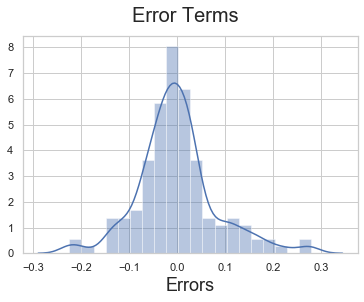

In [433]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Prediction using the Final Model

Applying scaling on the test sets

In [416]:
# Apply scaler() to all the columns except the 'binary' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke',
            'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [417]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,2.080645,0.887097,0.822581,0.564516,0.032258,0.370121,0.486741,0.375212,0.454249,0.371743,0.228835,0.667691,0.654504,0.209375,0.359521,0.393351,0.450941,0.466701,0.209644,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,1.358620,0.319058,0.385142,0.499868,0.178127,0.179970,0.183964,0.208977,0.234487,0.222354,0.188416,0.228484,0.173913,0.273690,0.252970,0.192092,0.258014,0.217041,0.210911,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.265306,0.389764,0.221053,0.264423,0.219125,0.126638,0.515873,0.590164,0.093750,0.140323,0.265306,0.208333,0.290323,0.076536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,0.000000,0.327988,0.475591,0.326316,0.485577,0.344065,0.183406,0.674603,0.699454,0.125000,0.312903,0.346939,0.416667,0.451613,0.136847,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,0.000000,0.482507,0.642126,0.421053,0.605769,0.540726,0.287118,0.857143,0.759563,0.150000,0.432258,0.540816,0.625000,0.580645,0.280049,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.

#### Dividing into X_test and y_test

In [418]:
y_test = df_test.pop('price')
X_test = df_test

In [424]:
# Adding constant variable to test dataframe and keeping only the variables that are remaining in Final Model.
X_test_sm = sm.add_constant(X_test[X.columns])

In [425]:
# Making predictions using the final model

y_pred_sm = lr_53.predict(X_test_sm)

## Model Evaluation

In [426]:
from sklearn.metrics import r2_score

In [427]:
r2_score(y_true=y_test, y_pred=y_pred_sm)

0.8250188875781057

Text(0, 0.5, 'y_pred')

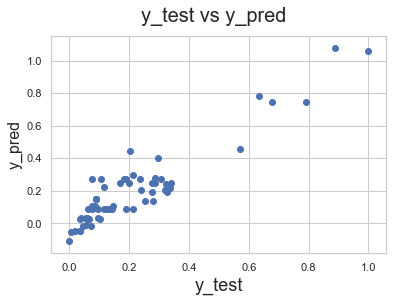

In [428]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_sm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

We can see that the equation of our best fitted line is:

$ price = -0.064 + 1.140  \times  enginesize - 0.045  \times  hatchback + 0.278 \times rotor + 0.197 \times bmw + 0.234 \times porsche + 0.102 \times saab $


Overall we have a decent model, but we also acknowledge that we could do better. 

We could add more feature that we might have dropped and that needed more inspection.

Better domain understanding may also be required to select appropriate features.